In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

**Importing the dataset**

In [4]:
df=pd.read_csv("./Social_Network_Ads.csv")
df.head(4)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0


In [5]:
df=df.drop("User ID",axis=1)
df["Gender"].replace(["Male","Female"],[1,0],inplace=True)

In [6]:
df.head(4)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0


**Splitting the dataset into the Training set and Test set**

In [7]:
x=df.drop("Purchased",axis=1)
y=df["Purchased"]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Feature Scaling**

In [8]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [10]:
minmax.fit(x_train)

x_train_scaled=minmax.fit_transform(x_train)
x_test_scaled=minmax.fit_transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt=DecisionTreeClassifier(random_state=22)
dt.fit(x_train_scaled,y_train)
print("The test score",dt.score(x_test_scaled,y_test))

The test score 0.8333333333333334


In [17]:
dt.get_depth()

9

In [18]:
from sklearn.model_selection import cross_val_score

In [23]:
train=[]
test=[]
for i in range(3,9):
    dt=DecisionTreeClassifier(random_state=22,max_depth=i)
    dt.fit(x_train_scaled,y_train)
    train.append(cross_val_score(dt,x_train_scaled,y_train).mean())
    test.append(dt.score(x_test_scaled,y_test))

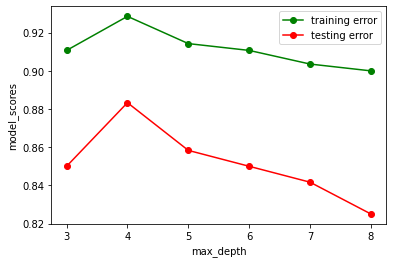

In [24]:
plt.plot(range(3,9),train,label="training error",marker="o",color="green")
plt.plot(range(3,9),test,label="testing error",marker="o",color="red")
plt.xlabel("max_depth")
plt.ylabel("model_scores")
plt.legend()
plt.show()

In [26]:
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(x_train_scaled,y_train)
print("The Taining score  :",round(cross_val_score(dt,x_train_scaled,y_train).mean(),2))
print("\n")
print("The Testing score  :",round(dt.score(x_test_scaled,y_test),2))

The Taining score  : 0.93


The Testing score  : 0.88


**Predicting the Test set results**

In [27]:
y_pred=dt.predict(x_test_scaled)

**Making the Confusion Matrix**

In [28]:
from sklearn.metrics import plot_confusion_matrix

**Visualising the Training set results**

C:\Users\Hariharan.M\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


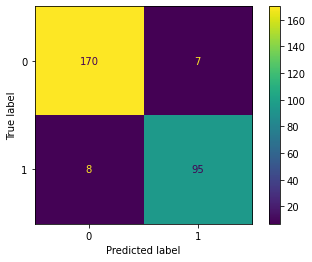

In [29]:
plot_confusion_matrix(dt,x_train_scaled,y_train)

**Visualising the Test set results**

C:\Users\Hariharan.M\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


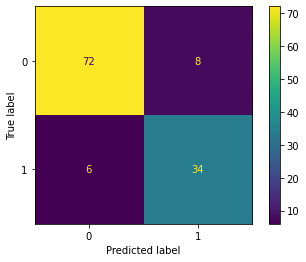

In [30]:
plot_confusion_matrix(dt,x_test_scaled,y_test)